In [1]:
from __future__ import division

import gym
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import tensorflow.contrib.slim as slim

import trackpy as tp
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import scipy.misc
import os
%matplotlib inline
from trackpy.predict import NearestVelocityPredict

import cv2

/home/ubuntu/env2.7/local/lib/python2.7/site-packages/trackpy/utils.py:46: UserWarning: Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot be used. For better linking performance, upgrade or downgrade scipy.
  warnings.warn("Due to a bug in Scipy 0.18.0, the (faster) cKDTree cannot "


In [2]:
import pdb
from time import sleep

import tensorflow.python.platform
from tensorflow.python.platform import gfile

from PIL import Image
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier

import cPickle

In [3]:
from piaget import Point, Mover, MoverTracker, FramePair, Box, Categorizer
from piaget import init_env, play

In [21]:
random_seed = 63

In [22]:
np.random.seed(random_seed)
#env = gym.make('MsPacman-v0'); num_wait_steps=100;
#env = gym.make('Breakout-v0'); num_wait_steps = 1;
env = gym.make('Assault-v0'); num_wait_steps = 1;

[2017-05-27 02:42:50,642] Making new env: Assault-v0


In [23]:
import matplotlib.colors as mcolors
box_colors_rgb = np.array([mcolors.hex2color(v) for v in mcolors.cnames.values()]).reshape((1,150, 3))
box_colors_hsv = mcolors.rgb_to_hsv(box_colors_rgb)
good_indices = (box_colors_hsv[0][:,1] > 0.5) & (box_colors_hsv[0][:,2] < 0.8)

box_colors = box_colors_rgb[0][good_indices]

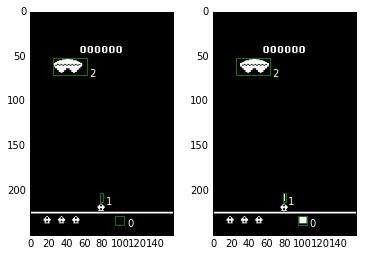

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (0,), Shift (5, 5) Score 1.0
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (5, 5), crop_backwards: (-5, -5)

Join (1,), Shift (5, 1) 

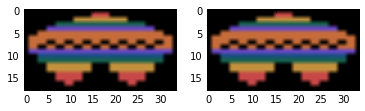

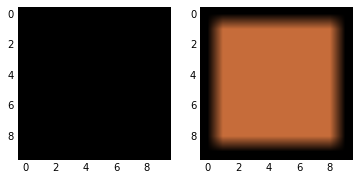

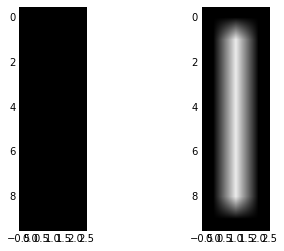

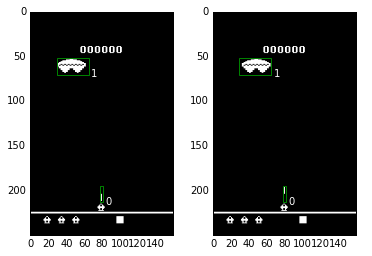

Join (0,), Shift (-9, 0) Score 0.353553390593
score_forwards: 360.624458405, score_backwards: 360.624458405
Crop: (-9, 0), crop_backwards: (9, 0)

Join (0,), Shift (-8, 0) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (-8, 0), crop_backwards: (8, 0)

Join (0,), Shift (-9, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-9, 1), crop_backwards: (9, -1)

Join (0,), Shift (-8, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-8, 1), crop_backwards: (8, -1)

Join (0,), Shift (-9, 0) Score 0.353553390593
score_forwards: 360.624458405, score_backwards: 360.624458405
Crop: (-9, 0), crop_backwards: (9, 0)

Join (0,), Shift (-8, 0) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (-8, 0), crop_backwards: (8, 0)

Join (0,), Shift (-9, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-9, 1), crop_backwards: (9, -1)

Join (0,), Shift (-8, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-8, 1), crop_ba

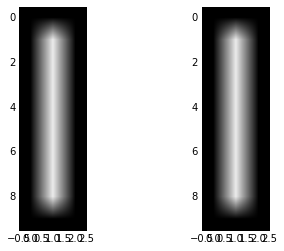

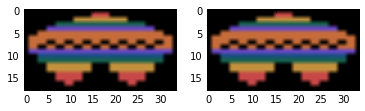

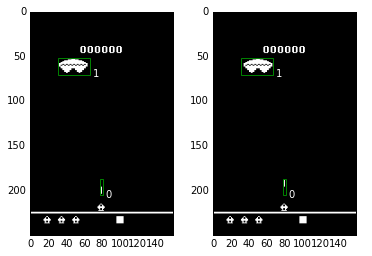

Join (0,), Shift (-9, 0) Score 0.353553390593
score_forwards: 360.624458405, score_backwards: 360.624458405
Crop: (-9, 0), crop_backwards: (9, 0)

Join (0,), Shift (-8, 0) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (-8, 0), crop_backwards: (8, 0)

Join (0,), Shift (-9, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-9, 1), crop_backwards: (9, -1)

Join (0,), Shift (-8, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-8, 1), crop_backwards: (8, -1)

Join (0,), Shift (-9, 0) Score 0.353553390593
score_forwards: 360.624458405, score_backwards: 360.624458405
Crop: (-9, 0), crop_backwards: (9, 0)

Join (0,), Shift (-8, 0) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (-8, 0), crop_backwards: (8, 0)

Join (0,), Shift (-9, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-9, 1), crop_backwards: (9, -1)

Join (0,), Shift (-8, 1) Score 1.0
score_forwards: 1020.0, score_backwards: 1020.0
Crop: (-8, 1), crop_ba

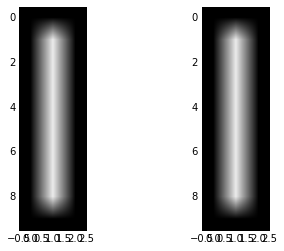

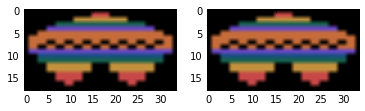

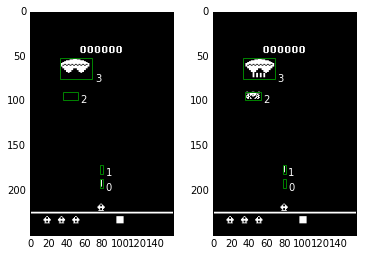

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.2489

Join (2, 3), Shift (1, 1) Score 0.982707629824
score_forwards: 3315.0, score_backwards: 3315.0
Crop: (1, 1), crop_backwards: (-1, -1)

Join (2, 3), Shift (0, 2) Score 0.824621125124
score_forwards: 2781.72158923, score_backwards: 2781.72158923
Crop: (0, 2), crop_backwards: (0, -2)

Join (2, 3), Shift (1, 2) Score 1.01136400117
score_forwards: 3411.66748087, score_backwards: 3411.66748087
Crop: (1, 2), crop_backwards: (-1, -2)

Join (2, 3), Shift (0, 1) Score 0.910258989833
score_forwards: 3070.60661759, score_backwards: 3070.60661759
Crop: (0, 1), crop_backwards: (0, -1)

Join (2, 3), Shift (1, 1) Score 0.982707629824
score_forwards: 3315.0, score_backwards: 3315.0
Crop: (1, 1), crop_backwards: (-1, -1)

Join (2, 3), Shift (0, 2) Score 0.824621125124
score_forwards: 2781.72158923, score_backwards: 2781.72158923
Crop: (0, 2), crop_backwards: (0, -2)

Join (2, 3), Shift (1, 2) Score 1.01136400117
score_forwards: 3411.66748087, score_backwards: 3411.66748087
Crop: (1, 2), crop_backwards: 

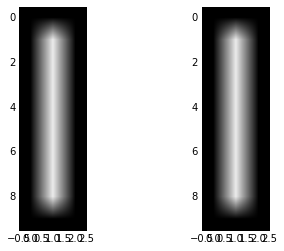

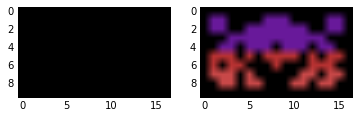

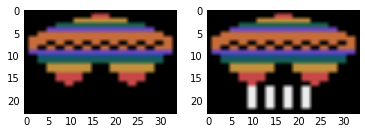

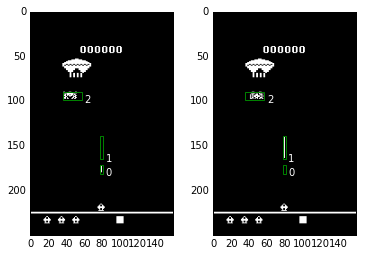

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, 1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, 1), crop_backwards: (-5, -1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (5, -1), crop_backwards: (-5, 1)

Join (0,), Shift (5, -1) Score 1.0
score_forwards: 721.2489

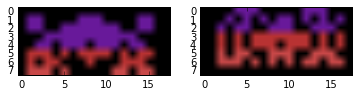

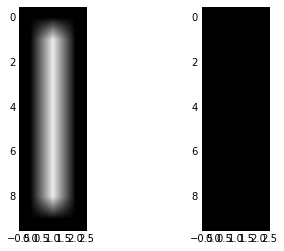

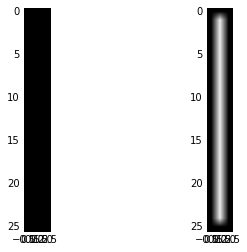

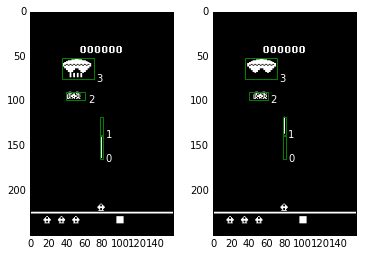

Join (0,), Shift (13, 1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (13, 1), crop_backwards: (-13, -1)

Join (0,), Shift (-12, 1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (-12, 1), crop_backwards: (12, -1)

Join (0,), Shift (13, -1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (13, -1), crop_backwards: (-13, 1)

Join (0,), Shift (-12, -1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (-12, -1), crop_backwards: (12, 1)

Join (0,), Shift (13, 1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (13, 1), crop_backwards: (-13, -1)

Join (0,), Shift (-12, 1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (-12, 1), crop_backwards: (12, -1)

Join (0,), Shift (13, -1) Score 1.0
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (13, -1), crop_backwards: (-13, 1)

Join (0,), Shift (-12


Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 4
winner: 2
winner params: [(2,), (0, 4)]
winner score: 0.0
self.cnt_best_params: {2: [(2,), (0, 4)]}
len(self.cnts): 4
winner: 3
winner params: [(3,), (0, 2)]
winner score: 0.471404520791
self.cnt_best_params: {2: [(2,), (0, 4)], 3: [(3,), (0, 2)]}
len(self.cnts): 4
winner: 0
winner params: [(0,), [13, 1]]
winner score: 1
self.cnt_best_params: {0: [(0,), [13, 1]], 2: [(2,), (0, 4)], 3: [(3,), (0, 2)]}
len(self.cnts): 4
winner: 1
winner params: [(1,), [12, 1]]
winner score: 1


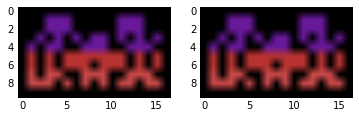

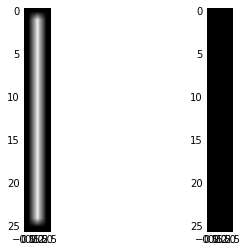

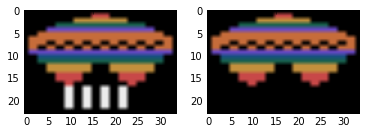

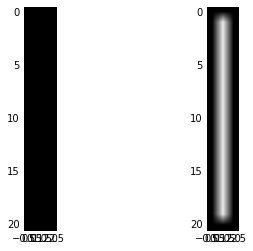

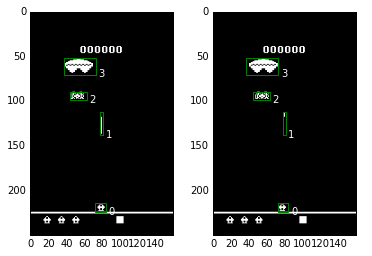

Join (0,), Shift (0, -2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (1, -2) Score 0.836660026534
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (1, -2), crop_backwards: (-1, 2)

Join (0,), Shift (0, -1) Score 0.774596669241
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, -1), crop_backwards: (0, 1)

Join (0,), Shift (1, -1) Score 0.894427191
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (1, -1), crop_backwards: (-1, 1)

Join (0,), Shift (0, -2) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -2), crop_backwards: (0, 2)

Join (0,), Shift (1, -2) Score 0.836660026534
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (1, -2), crop_backwards: (-1, 2)

Join (0,), Shift (0, -1) Score 0.774596669241
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, -1), crop_backwards: (0, 1)

Join (0,), Shift (1, -1) Score 0.

Join (2, 3), Shift (0, 1) Score 0.903300016742
score_forwards: 2940.80346164, score_backwards: 2940.80346164
Crop: (0, 1), crop_backwards: (0, -1)

Join (2, 3), Shift (1, 1) Score 1.03021827457
score_forwards: 3354.00134168, score_backwards: 3354.00134168
Crop: (1, 1), crop_backwards: (-1, -1)

Join (2, 3), Shift (0, 2) Score 0.391630224994
score_forwards: 1275.0, score_backwards: 1275.0
Crop: (0, 2), crop_backwards: (0, -2)

Join (2, 3), Shift (1, 2) Score 1.02424594439
score_forwards: 3334.55769181, score_backwards: 3334.55769181
Crop: (1, 2), crop_backwards: (-1, -2)


Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 4
winner: 0
winner params: [(0,), (0, -2)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -2)]}
len(self.cnts): 4
winner: 2
winner params: [(2,), (0, 2)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -2)], 2: [(2,), (0, 2)]}
len(self.cnts): 4
winner: 3
winner params: [(3,), (0, 2)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -2)], 2

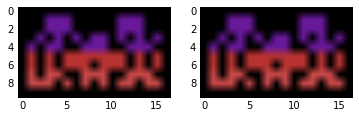

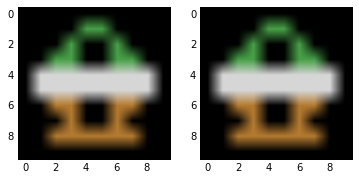

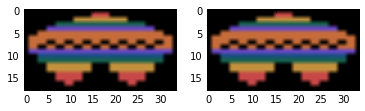

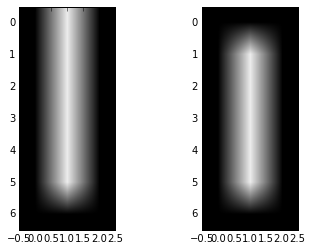

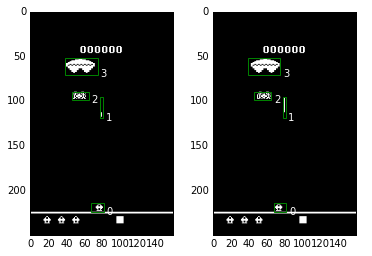

Join (0,), Shift (0, -4) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -4), crop_backwards: (0, 4)

Join (0,), Shift (1, -4) Score 0.797724035217
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (1, -4), crop_backwards: (-1, 4)

Join (0,), Shift (0, -3) Score 0.738548945876
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (1, -3) Score 0.852802865422
score_forwards: 1442.49783362, score_backwards: 1442.49783362
Crop: (1, -3), crop_backwards: (-1, 3)

Join (0,), Shift (0, -4) Score 0.0
score_forwards: 0.0, score_backwards: 0.0
Crop: (0, -4), crop_backwards: (0, 4)

Join (0,), Shift (1, -4) Score 0.797724035217
score_forwards: 1349.33316864, score_backwards: 1349.33316864
Crop: (1, -4), crop_backwards: (-1, 4)

Join (0,), Shift (0, -3) Score 0.738548945876
score_forwards: 1249.23976882, score_backwards: 1249.23976882
Crop: (0, -3), crop_backwards: (0, 3)

Join (0,), Shift (1, -3) Score

Crop: (0, 2), crop_backwards: (0, -2)

Join (2, 3), Shift (1, 2) Score 1.02424594439
score_forwards: 3334.55769181, score_backwards: 3334.55769181
Crop: (1, 2), crop_backwards: (-1, -2)


Starting . . . 


self.cnt_best_params: {}
len(self.cnts): 4
winner: 0
winner params: [(0,), (0, -4)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -4)]}
len(self.cnts): 4
winner: 2
winner params: [(2,), (0, 2)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -4)], 2: [(2,), (0, 2)]}
len(self.cnts): 4
winner: 3
winner params: [(3,), (0, 2)]
winner score: 0.0
self.cnt_best_params: {0: [(0,), (0, -4)], 2: [(2,), (0, 2)], 3: [(3,), (0, 2)]}
len(self.cnts): 4
winner: 1
winner params: [(1,), (-17, 0)]
winner score: 0.738548945876


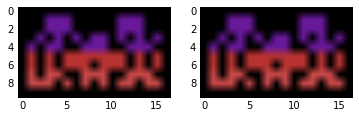

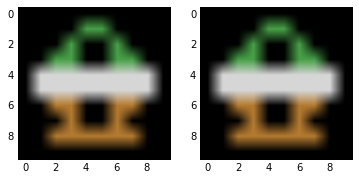

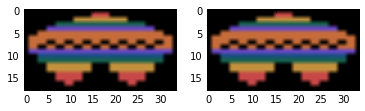

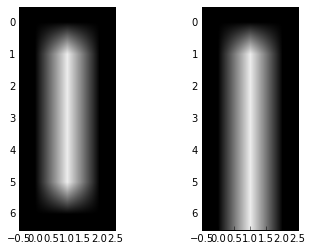

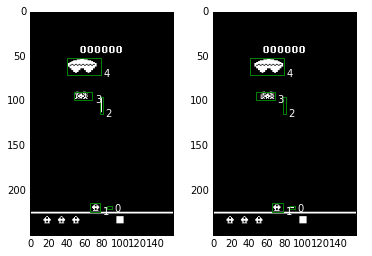

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwar

Join (1, 3), Shift (-1, 4) Score 1.02553602469
score_forwards: 2816.56705938, score_backwards: 2816.56705938
Crop: (-1, 4), crop_backwards: (1, -4)

Join (1, 3), Shift (0, 4) Score 0.742781352708
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (0, 4), crop_backwards: (0, -4)

Join (1, 3), Shift (-1, 3) Score 1.05862630572
score_forwards: 2907.447334, score_backwards: 2907.447334
Crop: (-1, 3), crop_backwards: (1, -3)

Join (1, 3), Shift (0, 3) Score 1.04221250067
score_forwards: 2862.36790088, score_backwards: 2862.36790088
Crop: (0, 3), crop_backwards: (0, -3)

Join (1, 3), Shift (-1, 4) Score 1.02553602469
score_forwards: 2816.56705938, score_backwards: 2816.56705938
Crop: (-1, 4), crop_backwards: (1, -4)

Join (1, 3), Shift (0, 4) Score 0.742781352708
score_forwards: 2040.0, score_backwards: 2040.0
Crop: (0, 4), crop_backwards: (0, -4)

Join (1, 4), Shift (-1, 3) Score 0.959317390165
score_forwards: 4064.03124988, score_backwards: 4064.03124988
Crop: (-1, 3), crop_backwards: (

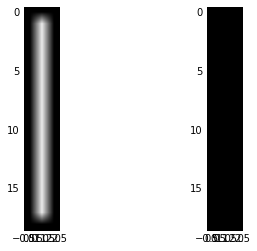

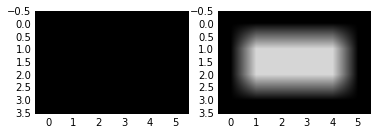

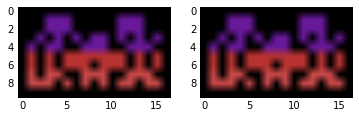

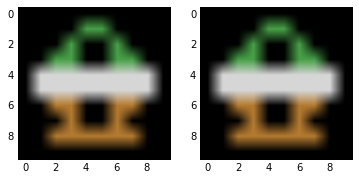

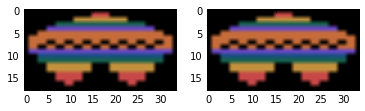

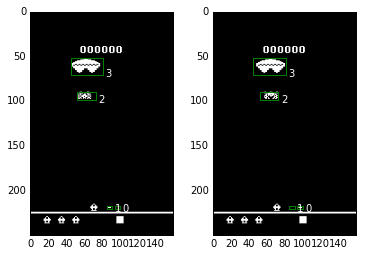

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwards: 721.24891681, score_backwards: 721.24891681
Crop: (-2, -3), crop_backwards: (2, 3)

Join (0,), Shift (-2, -3) Score 1.0
score_forwar

Join (1, 3), Shift (-1, 2) Score 1.01307245026
score_forwards: 3900.7499279, score_backwards: 3900.7499279
Crop: (-1, 2), crop_backwards: (1, -2)

Join (1, 3), Shift (0, 2) Score 0.66885605406
score_forwards: 2575.37375928, score_backwards: 2575.37375928
Crop: (0, 2), crop_backwards: (0, -2)

Join (1, 3), Shift (-1, 1) Score 1.00873379028
score_forwards: 3884.04428399, score_backwards: 3884.04428399
Crop: (-1, 1), crop_backwards: (1, -1)

Join (1, 3), Shift (0, 1) Score 0.848114523879
score_forwards: 3265.59336109, score_backwards: 3265.59336109
Crop: (0, 1), crop_backwards: (0, -1)

Join (1, 3), Shift (-1, 2) Score 1.01307245026
score_forwards: 3900.7499279, score_backwards: 3900.7499279
Crop: (-1, 2), crop_backwards: (1, -2)

Join (1, 3), Shift (0, 2) Score 0.66885605406
score_forwards: 2575.37375928, score_backwards: 2575.37375928
Crop: (0, 2), crop_backwards: (0, -2)

Join (2, 3), Shift (-1, 1) Score 0.989361399508
score_forwards: 3468.37497973, score_backwards: 3468.37497973
Crop:

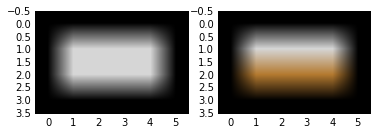

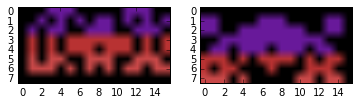

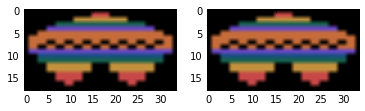

64468


In [33]:
num_steps = 10
img_dir = 'img/'
mt_dir = 'mt/'
mt = play(num_steps, env, img_dir, mt_dir, num_wait_steps, 2180)
fp = mt.frame_pairs
frame_thresh = [f.thresh for f in fp]

print mt.game_id

In [34]:
print mt.game_id

64468


In [19]:
traj = mt.movers[0].trajectory
disp_boxes = [(t1[1]-t0[1]) for t1, t0 in zip(traj[1:],traj[:-1])]
disp_pts = [b.ll for b in disp_boxes]
disp_unique = {d.to_tuple() for d in disp_pts}
disp_unique

{(2, 0), (4, 0)}

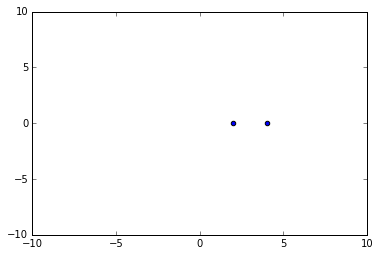

In [20]:
plt.scatter(*zip(*disp_unique))
plt.axis([-10,10,-10,10]);


 Frame: 0


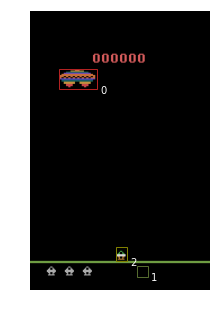


 Frame: 1


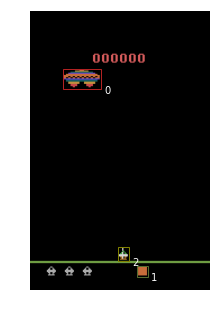


 Frame: 2


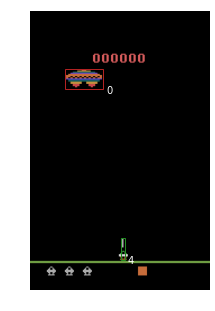


 Frame: 3


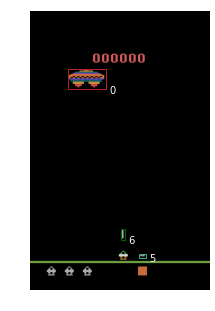


 Frame: 4


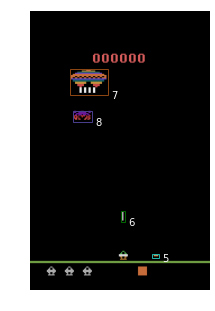


 Frame: 5


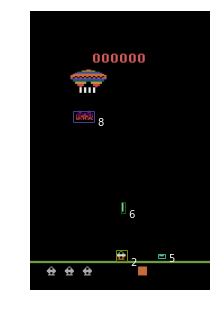


 Frame: 6


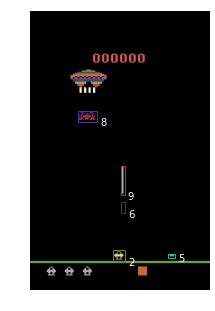


 Frame: 7


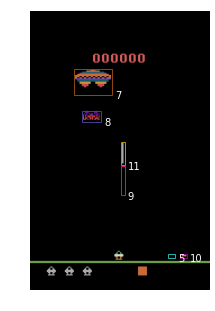


 Frame: 8


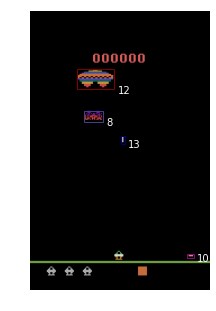


 Frame: 9


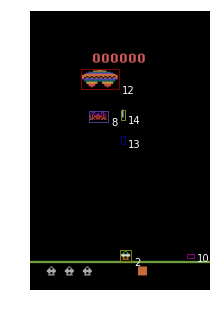


 Frame: 10


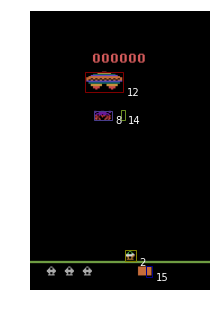


 Frame: 11


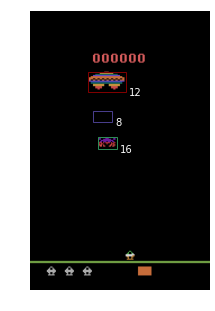


 Frame: 12


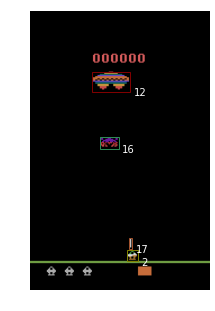


 Frame: 13


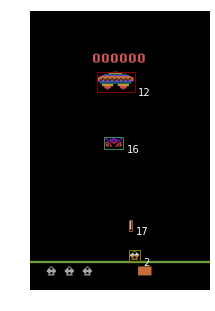


 Frame: 14


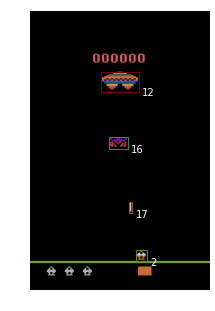


 Frame: 15


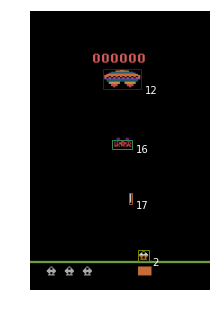


 Frame: 16


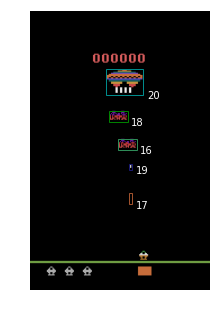


 Frame: 17


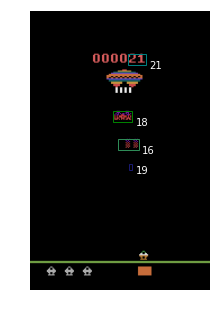


 Frame: 18


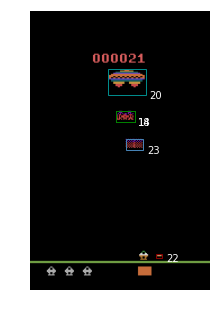


 Frame: 19


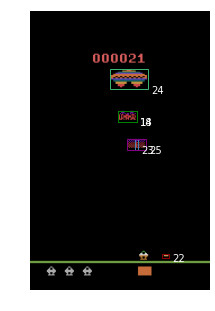


 Frame: 20


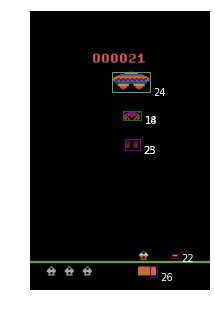


 Frame: 21


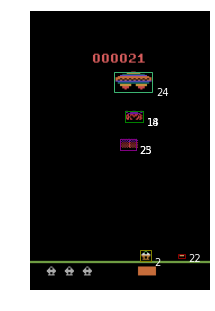


 Frame: 22


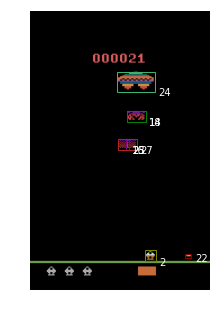


 Frame: 23


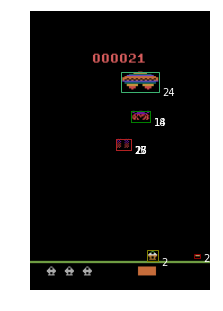


 Frame: 24


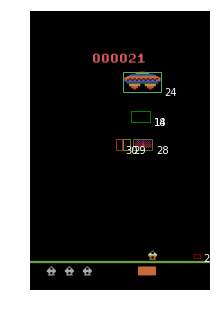


 Frame: 25


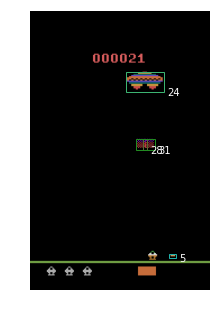

In [16]:
for i in range(mt.cur_frame):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
        
    ax = plt.gca()
    plt.axis('off')
    if i == 0:
        plt.imshow(fp[i].s0)
    else:
        plt.imshow(fp[i-1].s1)
    for data in movers_cur_frame:
        m_id = data[0]
        box = data[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[(m_id+1) % len(box_colors)],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()


 Frame: 0


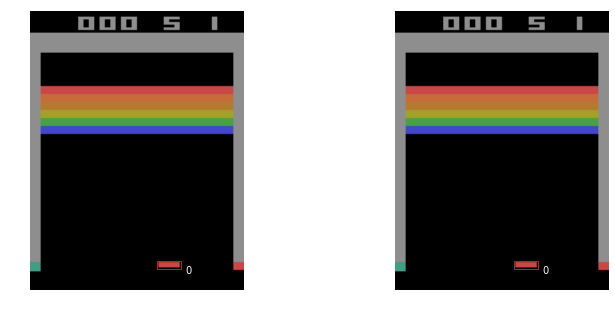


 Frame: 1


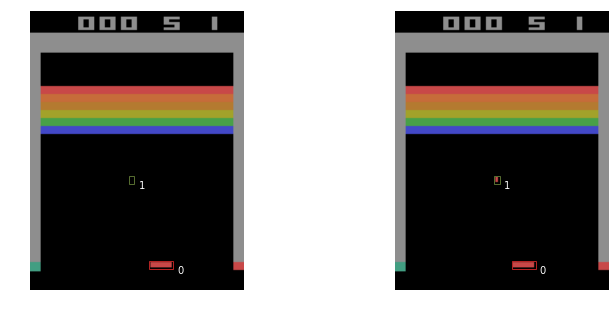


 Frame: 2


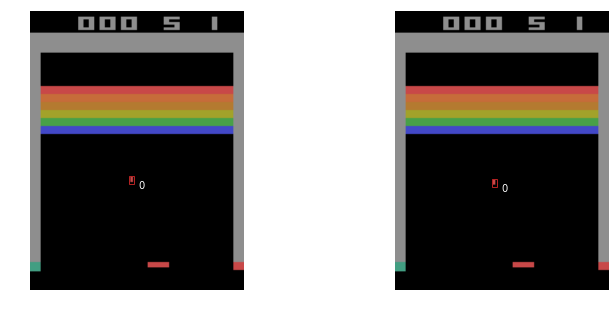


 Frame: 3


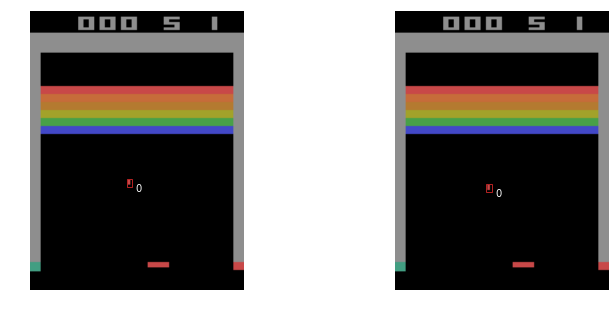


 Frame: 4


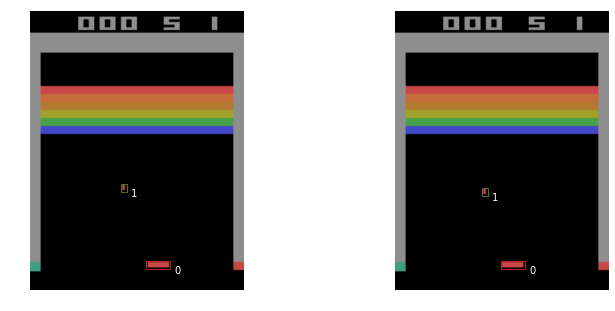


 Frame: 5


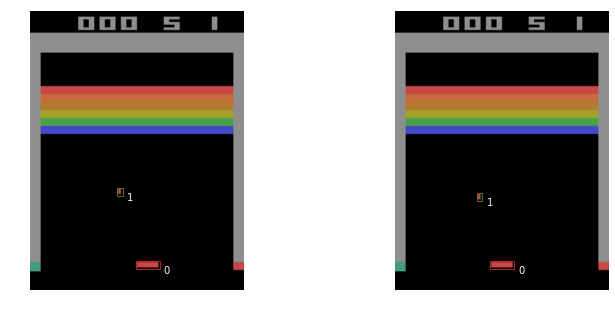


 Frame: 6


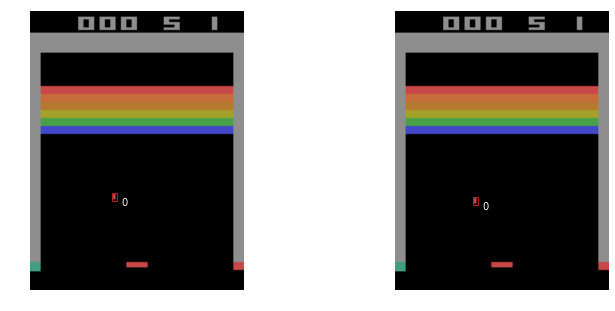


 Frame: 7


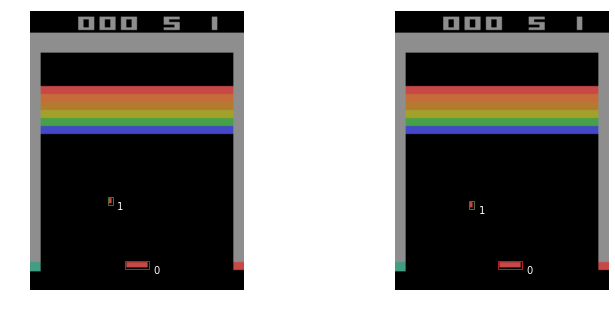


 Frame: 8


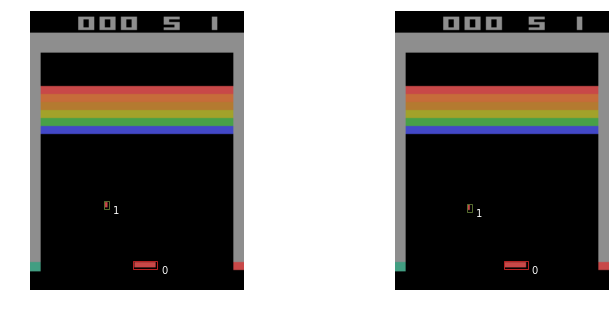


 Frame: 9


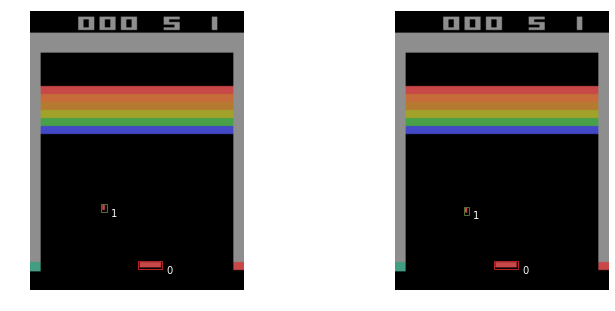


 Frame: 10


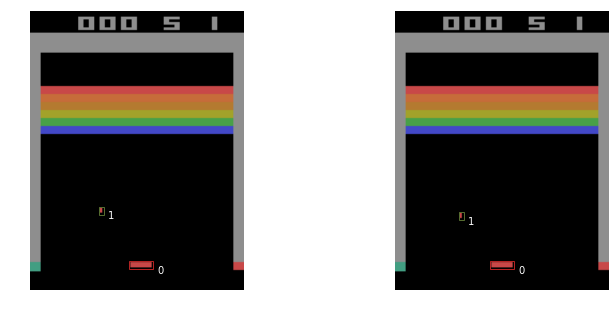


 Frame: 11


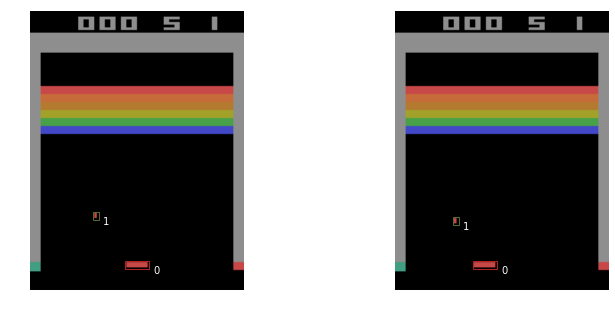


 Frame: 12


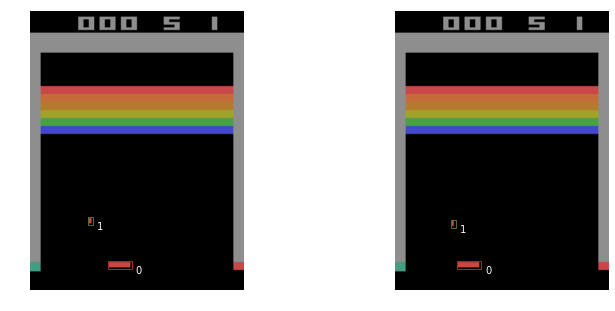


 Frame: 13


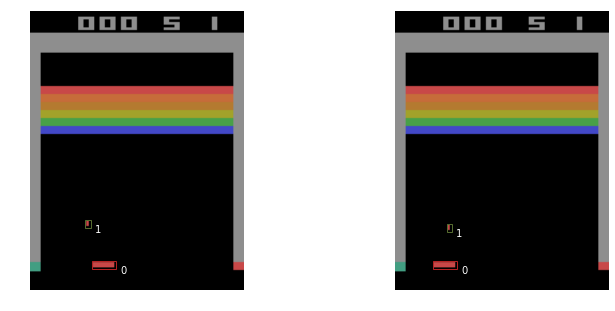


 Frame: 14


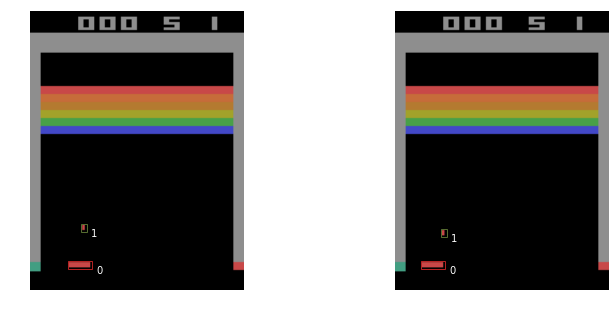


 Frame: 15


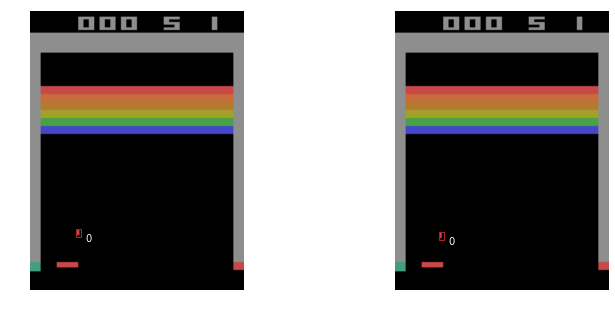


 Frame: 16


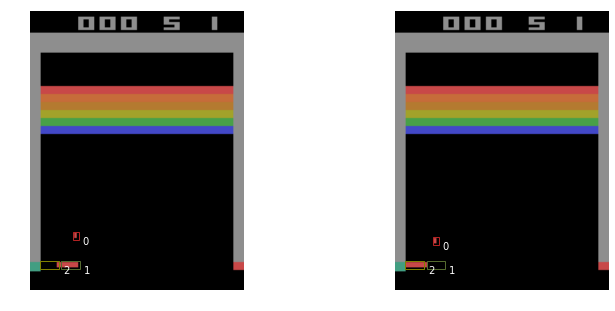


 Frame: 17


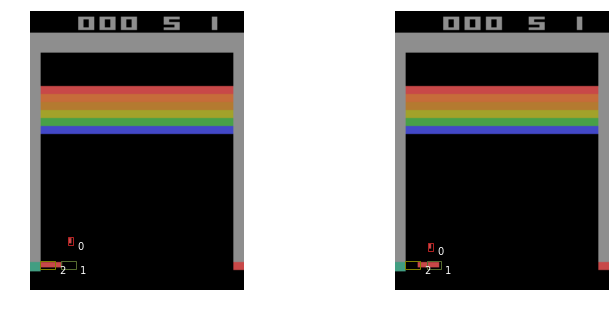


 Frame: 18


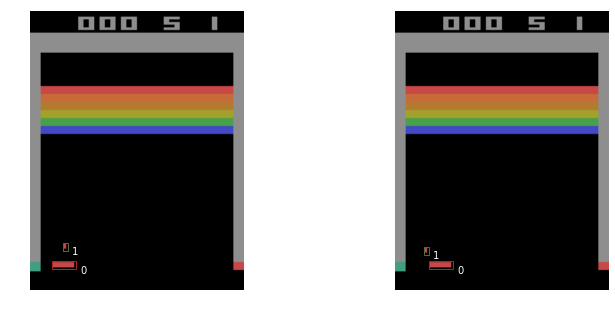


 Frame: 19


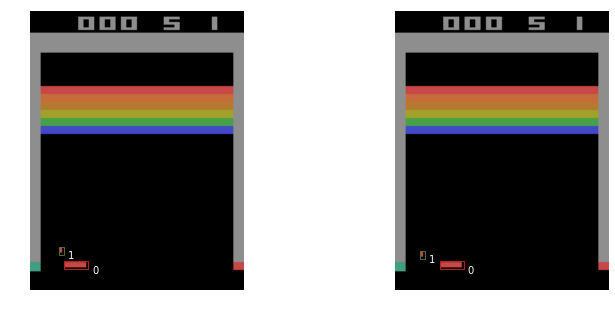


 Frame: 20


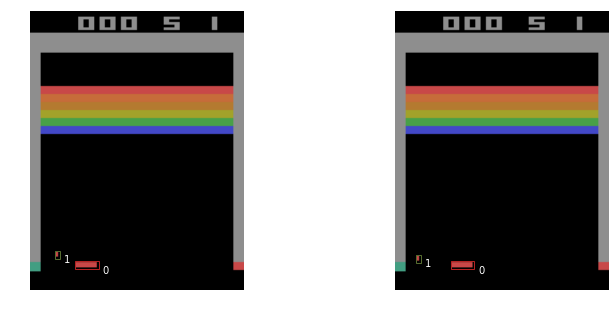


 Frame: 21


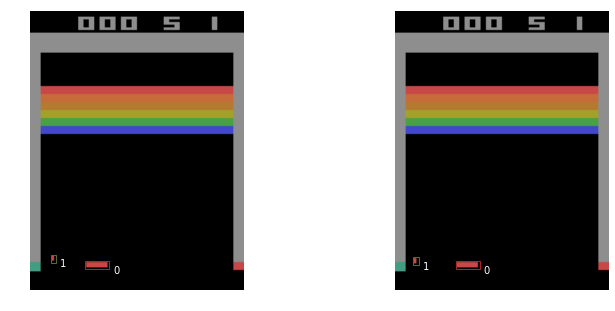


 Frame: 22


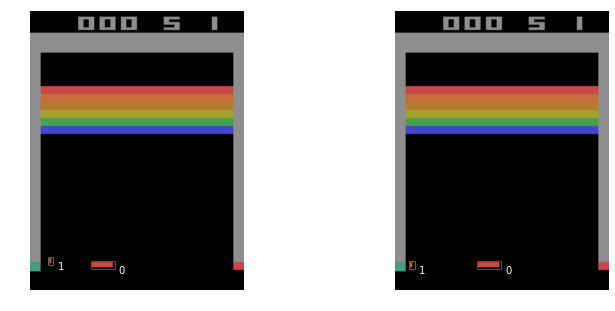


 Frame: 23


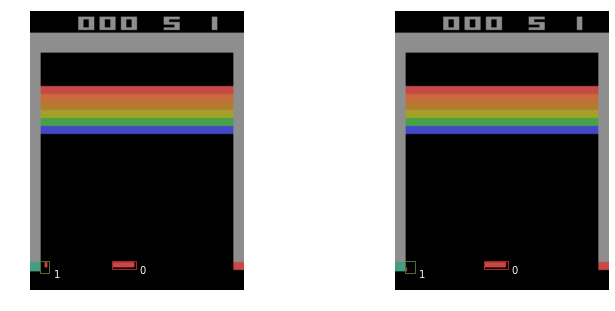


 Frame: 24


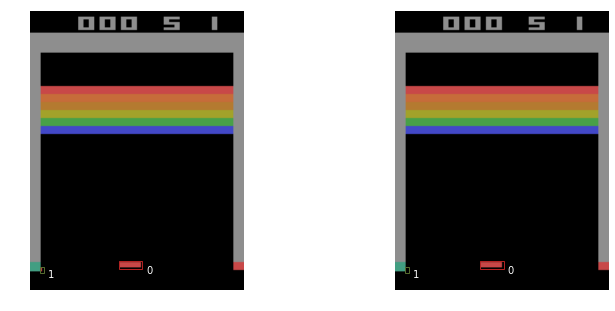


 Frame: 25


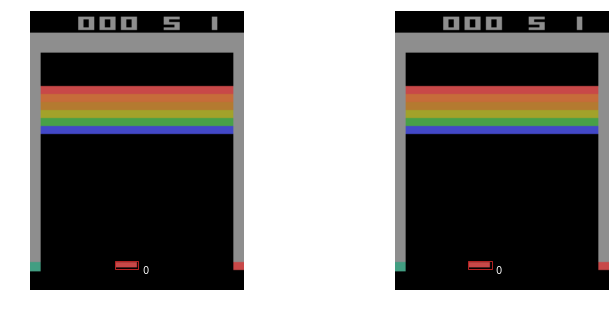


 Frame: 26


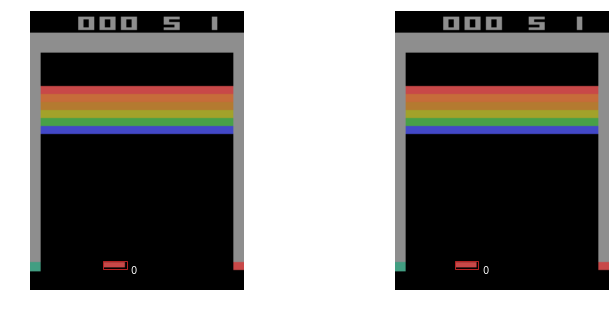


 Frame: 27


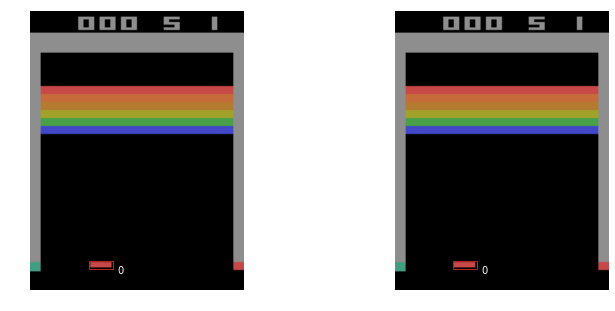


 Frame: 28


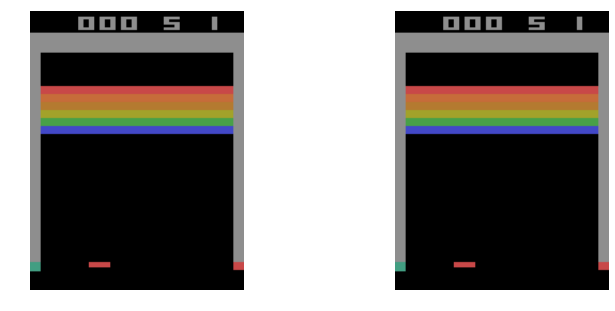


 Frame: 29


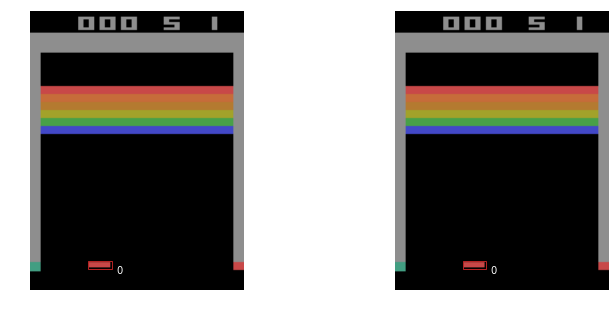


 Frame: 30


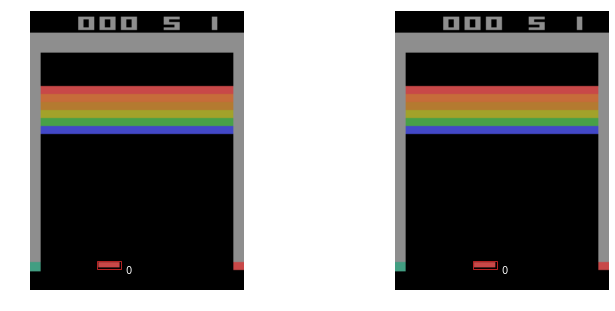


 Frame: 31


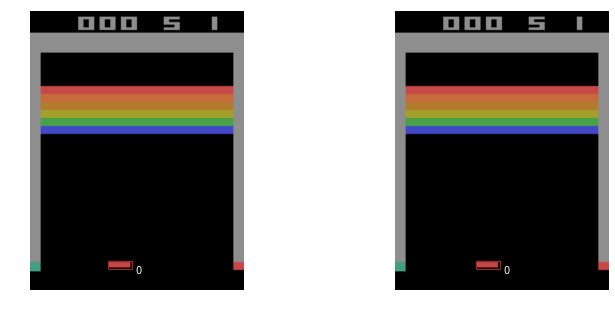


 Frame: 32


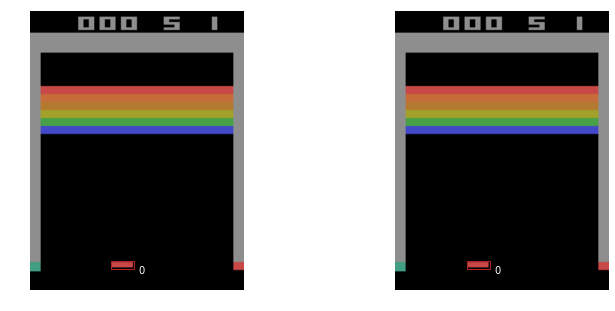


 Frame: 33


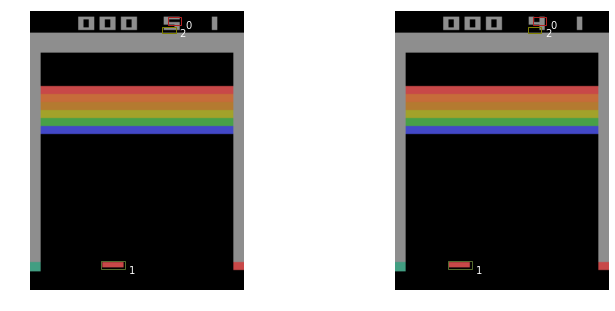


 Frame: 34


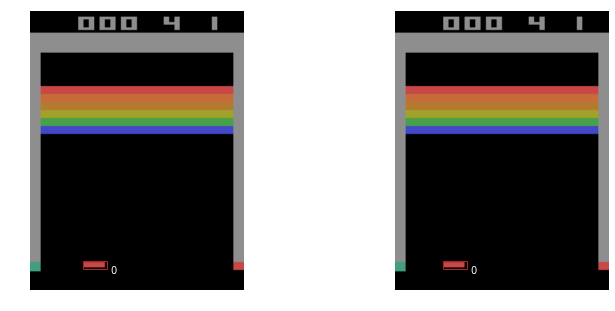

In [50]:
for i in range(mt.cur_frame-1):
    print '\n Frame: ' + str(i)
    #print 'Action: ' + str(mt.action_hist[i]) + '\n'
    fig = plt.figure(figsize=(12,5))

    movers_cur_frame = []
    for m in mt.movers:
        cur_frame_pos = filter(lambda p: p[0]==i, m.trajectory)
        if len(cur_frame_pos) > 0:
            movers_cur_frame.append((m.id, cur_frame_pos[0][1]))
    ax = fig.add_subplot(121)
    plt.axis('off')
    plt.imshow(fp[i].s0)
    finder = fp[i].finder
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[0]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    ax = fig.add_subplot(122)
    plt.axis('off')
    plt.imshow(fp[i].s1)
    for m_id, boxes in enumerate(finder.mover_boxes):
        box = boxes[1]
        ax.add_patch(patches.Rectangle((box.ll.x, box.ll.y),
                                    box.width, box.height,
                                    color=box_colors[m_id+1],
                                    fill=False)
            )
        plt.text(box.ur.x+3, box.ur.y+3, str(m_id),color='w')
    plt.show()

In [ ]:
print mt.movers[1].trajectory
print mt.movers[2].trajectory

In [ ]:
print fp[2].mover_boxes[1][1]
print fp[3].mover_boxes[1][0]

print (fp[2].mover_boxes[1][1].ll).sq_dist(fp[3].mover_boxes[1][0].ll)
print (fp[2].mover_boxes[1][1].ur).sq_dist(fp[3].mover_boxes[1][0].ur)

In [ ]:
finder=fp[3].finder
#plt.imshow(finder.mover_boxes[1][1].img)
(5 + finder.cnts_joined[2].height) % finder.cnts_joined[2].height
finder.cnts_joined[2].height

In [ ]:
plt.imshow(fp[3].s0 - fp[2].s1)

In [ ]:
s0s = [f.s0 for f in fp]
s1s = [f.s1 for f in fp]

In [ ]:
ii = 2

f0 = cv2.cvtColor(fp[ii].s0, cv2.COLOR_BGR2GRAY).astype('float32')
f1 = cv2.cvtColor(fp[ii].s1, cv2.COLOR_BGR2GRAY).astype('float32')
s0 = fp[ii].s0
s1 = fp[ii].s1

boxes = fp[ii].boxes

plt.imshow(f1-f0)

In [ ]:
def join_cnts(cnts, inds):
    (x, y, w, h) = cv2.boundingRect(cnts[inds[0]])
    ll = Point(x,y)
    ur = Point(x+w,y+h)
    for ind in inds[1:]:
        (x, y, w, h) = cv2.boundingRect(cnts[ind]) 
        if x < ll.x:
            ll.x = x
        if x > ur.x:
            ur.x = x
        if y < ll.y:
            ll.y = y
        if y > ur.y:
            ur.y = y
    return Box(ll,ur)

In [ ]:
frame_diff = fp[ii].s1 - fp[ii].s0
fd_grey = cv2.cvtColor(frame_diff, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(fd_grey,1,255,cv2.THRESH_BINARY)[1]
thresh_dilated = cv2.dilate(thresh,None,iterations=1)
(cnts, _) = cv2.findContours(thresh_dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

from itertools import combinations
all_joins = [c \
 for l in range(1,len(cnts)+1) \
 for c in combinations(range(len(cnts)),l)\
]

cnts_joined = [join_cnts(cnts,inds) for inds in all_joins] 

'''
for i, c in enumerate(cnts_joined):
    (x, y, w, h) = (c.ll.x, c.ll.y, c.width, c.height)
    plt.imshow(thresh_dilated,cmap='gray')
    ax = plt.gca()
    plt.axis([0, 159, 209, 0])
    ax.add_patch(patches.Rectangle((x,y),w,h,color='g',fill=False))
    plt.show()
'''

In [ ]:
def generate_translate(f0, f1, shifts, debug=False):
    out = np.zeros(f0.shape)
    #out = f1.copy()
    n_changed = 0
    for i in range(shifts.shape[0]):
        for j in range(shifts.shape[1]):
            try:
                x_out_float = (i+shifts[i,j,0])# % out.shape[0]
                y_out_float = (j+shifts[i,j,1])# % out.shape[1]
                
                #frac_x = x_out_float - int(x_out_float)
                #frac_y = y_out_float - int(y_out_float)

                x_out = np.round(x_out_float).astype(int) % out.shape[0]
                y_out = np.round(y_out_float).astype(int) % out.shape[1]
                
                out[x_out,y_out,:] = f0[i,j,:]
                #out[x_out,y_out,:] = (1-frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out+1,y_out,:] += (frac_x)*(1-frac_y)*f0[i,j,:]
                #out[x_out,y_out+1,:] += (1-frac_x)*(frac_y)*f0[i,j,:]
                #out[x_out+1,y_out+1,:] += (frac_x)*(frac_y)*f0[i,j,:]
                n_changed += 1
            except IndexError:
                pass
    if debug:
        return out, n_changed
    else:
        return out

In [ ]:
all_joins

In [ ]:
cnt_scores = {i: [] for i in range(len(cnts))}
cnt_score_params = {i: [] for i in range(len(cnts))}
for box_id, box in enumerate(cnts_joined):
    print box_id, '\n'
    box0 = Box(box.ll, box.ur)
    box1 = Box(box.ll, box.ur)
    # grayscale
    box0.add_image(f0)
    box1.add_image(f1)

    box0_1channel = np.expand_dims(box0.img,2)
    box1_1channel = np.expand_dims(box1.img,2)
    
    shifts = np.zeros((f0.shape[0],f0.shape[1],2))
    pc = cv2.phaseCorrelate(box0.img,box1.img)
    four_shifts = [[np.floor(pc[1]),np.floor(pc[0])],\
                   [np.ceil(pc[1]),np.floor(pc[0])],\
                   [np.floor(pc[1]),np.ceil(pc[0])],\
                   [np.ceil(pc[1]),np.ceil(pc[0])]
                  ]
    best_ratio = 1
    
    best_shift = four_shifts[0]
    for s in four_shifts:
        shifts[:,:,0] = s[0]
        shifts[:,:,1] = s[1]

        synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
        synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

        ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
        ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

        ratio_s = max(ratio0,ratio1)
        if ratio_s < best_ratio:
            best_shift = s
            best_ratio = ratio_s
    
    s = best_shift
    for ind in all_joins[box_id]:
        cnt_scores[ind].append(best_ratio)
        cnt_score_params[ind].append([all_joins[box_id], s])
    
    shifts[:,:,0] = s[0]
    shifts[:,:,1] = s[1]

    synth_box1 = generate_translate(box0_1channel,box1_1channel,shifts)
    synth_box0 = generate_translate(box1_1channel,box0_1channel,-shifts)

    ratio0 = score(box0_1channel,box1_1channel,shifts)/score(box0_1channel,box1_1channel,0*shifts)
    ratio1 = score(box1_1channel,box0_1channel,-shifts)/score(box1_1channel,box0_1channel,-0*shifts)

    print ratio0
    print ''
    print ratio1
    print ''

    print s, '\n'

    plt.figure()
    plt.subplot(141)
    plt.axis('off')
    plt.imshow(box0.img,cmap='gray')
    plt.subplot(142)
    plt.axis('off')
    plt.imshow(box1.img,cmap='gray')
    plt.subplot(143)
    plt.axis('off')
    plt.imshow(synth_box0.squeeze(),cmap='gray')
    plt.subplot(144)
    plt.axis('off')
    plt.imshow(synth_box1.squeeze(),cmap='gray')

    plt.figure()
    plt.subplot(121)
    plt.axis('off')
    plt.imshow(box0.img - box1.img)
    plt.colorbar()
    plt.subplot(122)
    plt.axis('off')
    plt.imshow(box0.img - synth_box0.squeeze())
    plt.colorbar()

    plt.show()

In [ ]:
print cnt_scores
print cnt_score_params

print cnt_scores_remaining

In [ ]:
pdb.set_trace()
cnt_best_params = {}
cnt_scores_remaining = cnt_scores.copy()
cnt_score_params_remaining = cnt_score_params.copy()

while len(cnt_best_params) < len(cnts):
    best_scores_cnts = {k: min(v) \
                        for k, v in cnt_scores_remaining.iteritems()}
    winning_index = np.argmin(best_scores_cnts.values())
    winner = best_scores_cnts.keys()[winning_index]
    winner_best_index = np.argmin(cnt_scores_remaining[winner])
    cnt_best_params[winner] = cnt_score_params[winner][winner_best_index]
    print cnt_scores_remaining, '\n'
    print cnt_score_params_remaining, '\n\n'
    forbidden_inds = set(cnt_best_params[winner][0])
    for k in cnt_scores_remaining:
        scores_k = cnt_scores_remaining[k]
        for j, sc in enumerate(scores_k):
            join_k_j = cnt_score_params_remaining[k][j][0]
            if len(forbidden_inds & set(join_k_j)) > 0:
                del cnt_scores_remaining[k][j]
                del cnt_score_params_remaining[k][j]
    cnt_scores_remaining.pop(winner)
cnt_best_params 

In [ ]:
cnt_best_params = {}
for cnt_id in cnt_scores:
    best_index = np.argmin(cnt_scores[cnt_id])
    cnt_best_params[cnt_id] = cnt_score_params[cnt_id][best_index]
cnt_best_params

In [ ]:
mover_joins = set()
mover_shifts = {}
for c in cnt_best_params.values():
    mover_joins.add(c[0])
    mover_shifts[c[0]] = Point(int(c[1][1]),int(c[1][0]))
mover_boxes = {inds: join_cnts(cnts,inds) for inds in mover_joins}

In [ ]:
for ind in mover_boxes:
    box = mover_boxes[ind]
    shift = mover_shifts[ind]
    # delete line below later
    shift = Point(shift.x, shift.y)
    print shift
    n_shift = -shift
    box0 = Box(box.ll-shift.thresh(-1), box.ur-shift.thresh(1))
    box1 = Box(box.ll-n_shift.thresh(-1), box.ur-n_shift.thresh(1))
    print box0.center
    print box1.center
    print box1.center - box0.center
    box0.add_image(s0)
    box1.add_image(s1)
    plt.subplot(121)
    plt.imshow(box0.img)
    plt.subplot(122)
    plt.imshow(box1.img)
    plt.show()

In [ ]:
def score(f0, f1, shifts):
    err = f1 - generate_translate(f0, f1, shifts)
    return np.sqrt(sum(err.flatten()**2))

def start(f0, f1):
    diff = f1 - f0
    nz = diff.nonzero()
    rand_nz = np.random.randint(nz[0].shape[0])
    point = (nz[0][rand_nz], nz[1][rand_nz])

    scores = []
    inds = []
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for i in range(-3,4):
        for j in range(-3,4):
            s[point[0], point[1], 0] = i
            s[point[0], point[1], 0] = j
            inds.append((i,j))
            scores.append(score(f0, f1, s))
    shift = inds[np.argmin(scores)]
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    s[point[0], point[1], 0] = shift[0]
    s[point[0], point[1], 1] = shift[1]
    print score(f0, f1, s)
    return shift

def expand(f0, f1, shift):
    diff = f1 - f0
    nz = diff.nonzero()
    s = np.zeros((s0.shape[0],s0.shape[1],2),dtype=int)
    for ind in range(nz[0].shape[0]-1):
        i = nz[0][ind]
        j = nz[1][ind]
        s[i,j,0] = shift[0]
        s[i,j,1] = shift[1]
    s[:,:,0] = shift[0]
    s[:,:,1] = shift[1]
    print score(f0, f1, s)
    return s

In [ ]:

mhi = np.zeros(frame_thresh[0].shape,dtype=np.float32)

f_gray = cv2.cvtColor(fp[0].s0, cv2.COLOR_BGR2GRAY)
cv2.updateMotionHistory(f_gray,mhi,1,10)

for i, f in enumerate(fp):
    f_gray = cv2.cvtColor(f.s1, cv2.COLOR_BGR2GRAY)
    cv2.updateMotionHistory(f_gray,mhi,i+2,10)

In [ ]:
for i in range(1,10):
    mhi2 = mhi.copy()
    mhi2[mhi2 != i] = 0
    plt.imshow(mhi2,cmap='gray')
    plt.show()

In [ ]:
mg_mask, mg_orient = cv2.calcMotionGradient(mhi,1,3)

for i in range(len(frame_thresh)+1):
    seg_mask, seg_bounds = \
    cv2.segmentMotion(mhi, i+1, 2)
    
    plt.figure(figsize=(12,5))
    ax = plt.subplot(131)
    plt.imshow(seg_mask,cmap='gray')
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(132)
    plt.imshow(s0s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    ax = plt.subplot(133)
    plt.imshow(s1s[i])
    plt.axis([0, 159, 209, 0])
    for rect in seg_bounds:
        x, y, rw, rh = rect
        silh_roi   = frame_thresh[1][y:y+rh,x:x+rw]
        orient_roi = mg_orient     [y:y+rh,x:x+rw]
        mask_roi   = mg_mask       [y:y+rh,x:x+rw]
        mhi_roi    = mhi           [y:y+rh,x:x+rw]

        angle = cv2.calcGlobalOrientation(orient_roi, mask_roi, mhi_roi, 2, 10)

        ax.add_patch(patches.Rectangle((x,y),rw,rh,fill=False,
                                       color='g',
                                      lw=2))
    plt.show()

In [ ]:
i=3
s0=s0s[i]
s1=s0s[i+1]

s0_gray = cv2.cvtColor(s0, cv2.COLOR_BGR2GRAY)
s1_gray = cv2.cvtColor(s1, cv2.COLOR_BGR2GRAY)

plt.imshow(s1-s0)

In [ ]:
shift

In [ ]:
shift = start(s0,s1)
print score(s0, s1, np.zeros((s0.shape[0],s0.shape[1],2),dtype=int))
s = expand(s0, s1, shift)
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(generate_translate(s0, s1, s))
plt.subplot(132)
plt.imshow(s0)
plt.subplot(133)
plt.imshow(s1)

In [ ]:
s = 0*np.ones((s0.shape[0],s0.shape[1],2),dtype=int)
s[:,:,0]=0

In [ ]:
plt.imshow(generate_translate(s0, s1, s))

In [ ]:
plt.imshow(s0)
plt.show()
plt.imshow(s1)
plt.show()